# Data Cleaning, Preprocessing & Visualization for SpaceX Launch Data


This notebook covers **Data Cleaning, Preprocessing**, and **Data Visualization** for the SpaceX launch dataset.
Steps include:
1. Handling missing data
2. Data transformations and encoding
3. Outlier detection and scaling features
4. Visualizations for understanding data distributions and relationships.


## Step 1: Importing Necessary Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler


## Step 2: Load Data

In [2]:

# Load the SpaceX data
data = pd.read_csv('SpaceX_Falcon9.csv')

# Display the first few rows of the data
data.head()


,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


## Step 3: Handle Missing Data

In [3]:

# Check for missing values in the dataset
print(data.isnull().sum())

# Handle missing values by filling them with the mean (for numerical) or mode (for categorical)
data['PayloadMass'].fillna(data['PayloadMass'].mean(), inplace=True)
data['Orbit'].fillna(data['Orbit'].mode()[0], inplace=True)

# Verify that missing values are handled
print(data.isnull().sum())


Unnamed: 0         0
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64
Unnamed: 0         0
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64


C:\Users\rakes\AppData\Local\Temp\ipykernel_6628\571777030.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PayloadMass'].fillna(data['PayloadMass'].mean(), inplace=True)
C:\Users\rakes\AppData\Local\Temp\ipykernel_6628\571777030.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

## Step 4: Data Transformation (One-Hot Encoding & Date Processing)

In [4]:

# Convert categorical variables to numerical using One-Hot Encoding
data = pd.get_dummies(data, columns=['BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'GridFins', 'Reused', 'LandingPad'], drop_first=True)

# For date columns, convert to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract year, month, and day for further analysis
data['LaunchYear'] = data['Date'].dt.year
data['LaunchMonth'] = data['Date'].dt.month
data['LaunchDay'] = data['Date'].dt.day

# Display the cleaned data
data.head()


,Unnamed: 0,FlightNumber,Date,PayloadMass,Flights,Legs,Block,ReusedCount,Serial,Longitude,...,Outcome_True RTLS,GridFins_True,Reused_True,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,LaunchYear,LaunchMonth,LaunchDay
0,0,1,2010-06-04,6123.547647,1,False,1.0,0,B0003,-80.577366,...,False,False,False,False,False,False,False,2010,6,4
1,1,2,2012-05-22,525.000000,1,False,1.0,0,B0005,-80.577366,...,False,False,False,False,False,False,False,2012,5,22
2,2,3,2013-03-01,677.000000,1,False,1.0,0,B0007,-80.577366,...,False,False,False,False,False,False,False,2013,3,1
3,3,4,2013-09-29,500.000000,1,False,1.0,0,B1003,-120.610829,...,False,False,False,False,False,False,False,2013,9,29
4,4,5,2013-12-03,3170.000000,1,False,1.0,0,B1004,-80.577366,...,False,False,False,False,False,False,False,2013,12,3


## Step 5: Outlier Detection

In [5]:

# Using Z-score to detect outliers
data['PayloadMass_zscore'] = zscore(data['PayloadMass'])

# Define outliers as values with Z-score > 3 or < -3
outliers = data[data['PayloadMass_zscore'].abs() > 3]

# Print outliers
print("Outliers in PayloadMass:")
print(outliers)


Outliers in PayloadMass:
Empty DataFrame
Columns: [Unnamed: 0, FlightNumber, Date, PayloadMass, Flights, Legs, Block, ReusedCount, Serial, Longitude, Latitude, Orbit_GEO, Orbit_GTO, Orbit_HEO, Orbit_ISS, Orbit_LEO, Orbit_MEO, Orbit_PO, Orbit_SO, Orbit_SSO, Orbit_VLEO, LaunchSite_KSC LC 39A, LaunchSite_VAFB SLC 4E, Outcome_False Ocean, Outcome_False RTLS, Outcome_None ASDS, Outcome_None None, Outcome_True ASDS, Outcome_True Ocean, Outcome_True RTLS, GridFins_True, Reused_True, LandingPad_5e9e3032383ecb554034e7c9, LandingPad_5e9e3032383ecb6bb234e7ca, LandingPad_5e9e3032383ecb761634e7cb, LandingPad_5e9e3033383ecbb9e534e7cc, LaunchYear, LaunchMonth, LaunchDay, PayloadMass_zscore]
Index: []

[0 rows x 40 columns]


## Step 6: Feature Scaling (Optional)

In [6]:

# Scale numerical features (if needed)
scaler = StandardScaler()
data[['PayloadMass', 'Longitude', 'Latitude']] = scaler.fit_transform(data[['PayloadMass', 'Longitude', 'Latitude']])

data.head()


,Unnamed: 0,FlightNumber,Date,PayloadMass,Flights,Legs,Block,ReusedCount,Serial,Longitude,...,GridFins_True,Reused_True,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,LaunchYear,LaunchMonth,LaunchDay,PayloadMass_zscore
0,0,1,2010-06-04,0.000000,1,False,1.0,0,B0003,0.411430,...,False,False,False,False,False,False,2010,6,4,0.000000
1,1,2,2012-05-22,-1.189724,1,False,1.0,0,B0005,0.411430,...,False,False,False,False,False,False,2012,5,22,-1.189724
2,2,3,2013-03-01,-1.157423,1,False,1.0,0,B0007,0.411430,...,False,False,False,False,False,False,2013,3,1,-1.157423
3,3,4,2013-09-29,-1.195037,1,False,1.0,0,B1003,-2.433736,...,False,False,False,False,False,False,2013,9,29,-1.195037
4,4,5,2013-12-03,-0.627646,1,False,1.0,0,B1004,0.411430,...,False,False,False,False,False,False,2013,12,3,-0.627646


## Step 7: Visualize the Distribution of Variables

### 7.1 Visualize the Distribution of Payload Mass

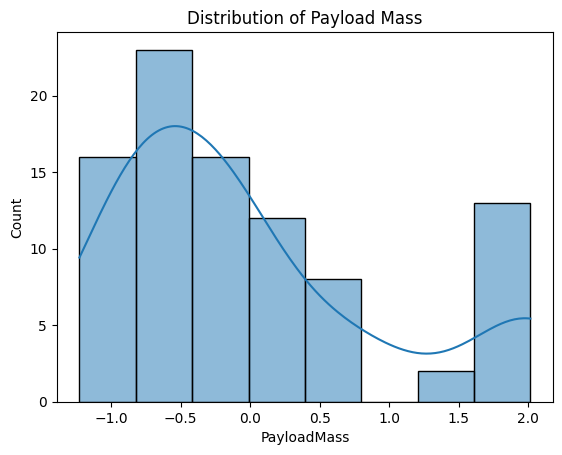

In [7]:

# Visualize the distribution of Payload Mass
sns.histplot(data['PayloadMass'], kde=True)
plt.title('Distribution of Payload Mass')
plt.show()


### 7.2 Visualize the Launch Outcome Distribution

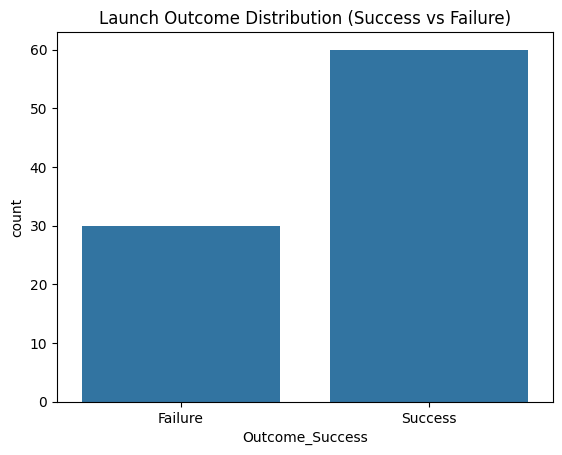

In [8]:
# Combine outcome columns into a single column representing outcome success/failure
data['Outcome'] = data[['Outcome_False Ocean', 'Outcome_False RTLS', 
                         'Outcome_None ASDS', 'Outcome_None None', 
                         'Outcome_True ASDS', 'Outcome_True Ocean', 
                         'Outcome_True RTLS']].idxmax(axis=1)

# Simplify outcome into 'Success' vs 'Failure' by grouping certain outcomes
data['Outcome_Success'] = data['Outcome'].apply(lambda x: 'Success' if 'True' in x else 'Failure')

# Visualize the simplified launch outcome distribution
sns.countplot(x='Outcome_Success', data=data)
plt.title('Launch Outcome Distribution (Success vs Failure)')
plt.show()


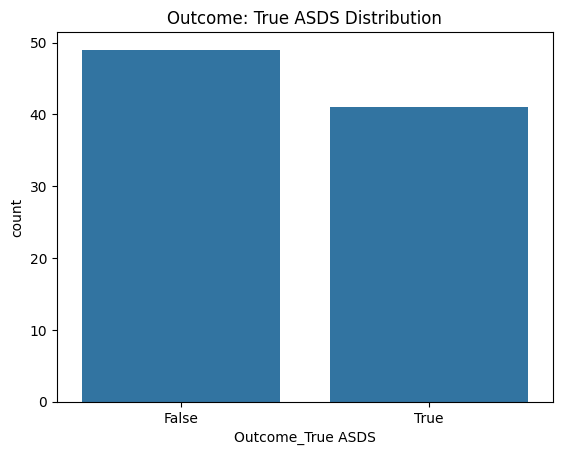

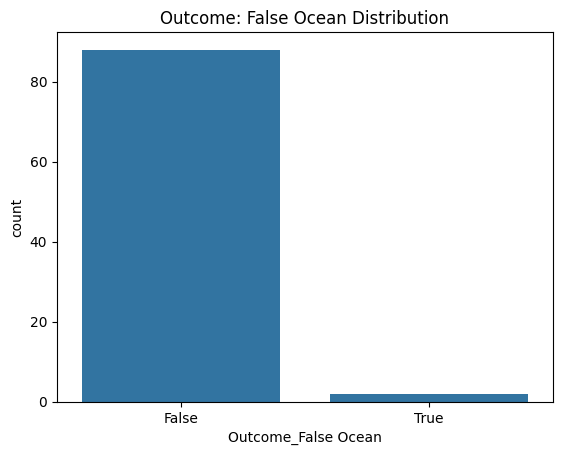

In [9]:
# Visualize specific Outcome columns like 'Outcome_True ASDS' and 'Outcome_False Ocean'
sns.countplot(x='Outcome_True ASDS', data=data)
plt.title('Outcome: True ASDS Distribution')
plt.show()

sns.countplot(x='Outcome_False Ocean', data=data)
plt.title('Outcome: False Ocean Distribution')
plt.show()


## Step 8: Correlation Heatmap

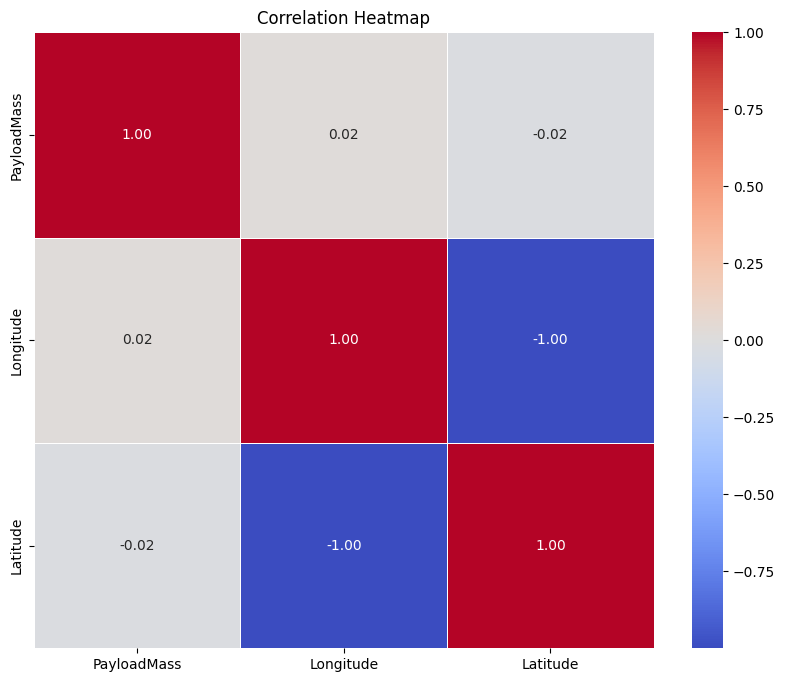

In [10]:

# Correlation matrix for numerical columns
corr = data[['PayloadMass', 'Longitude', 'Latitude']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Step 9: Visualizing Categorical Variables

### 9.1 Count Plot for GridFins Usage

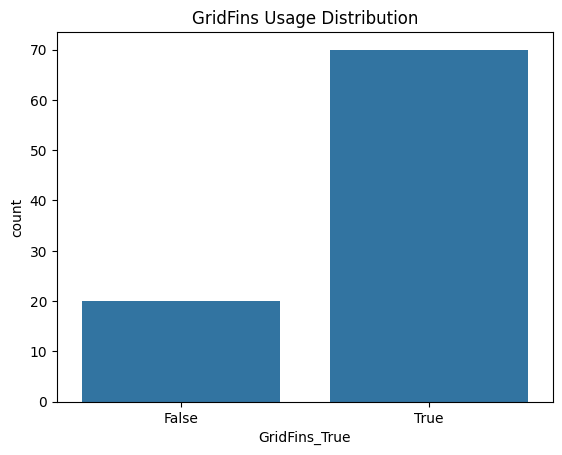

In [12]:
# Count plot for GridFins (whether or not gridfins are used)
sns.countplot(x='GridFins_True', data=data)  # Use 'GridFins_True' as the column name
plt.title('GridFins Usage Distribution')
plt.show()


### 9.2 Count Plot for Rocket Reusability

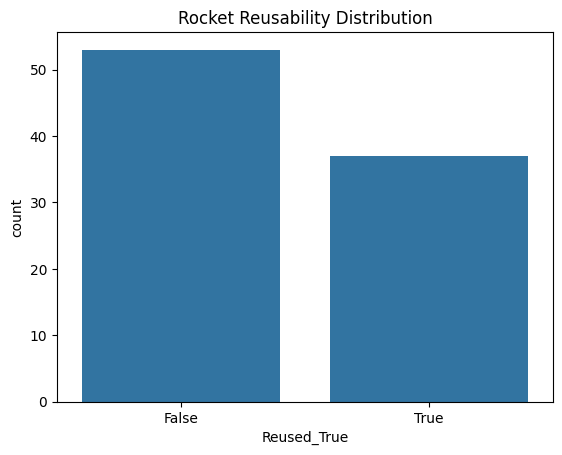

In [14]:
# Count plot for Reused (whether rocket was reused)
sns.countplot(x='Reused_True', data=data)  # Use 'Reused_True' as the correct column name
plt.title('Rocket Reusability Distribution')
plt.show()


## Step 10: Box Plot Comparing Payload Mass Across Outcomes

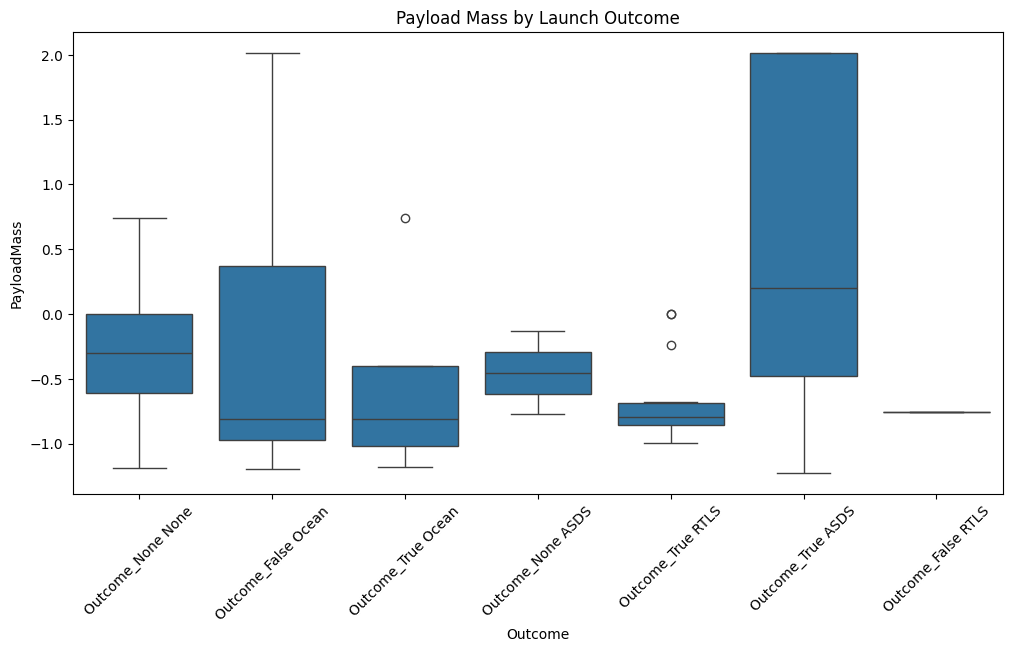

In [20]:
# Set the image size
plt.figure(figsize=(12, 6))  # Set the width and height in inches

# Box plot comparing Payload Mass for different Launch Outcomes
sns.boxplot(x='Outcome', y='PayloadMass', data=data)  # Ensure 'Outcome' exists in the dataset

# Rotate the x-axis labels
plt.xticks(rotation=45)  # Rotate labels by 45 degrees

plt.title('Payload Mass by Launch Outcome')
plt.show()
